# <font color="Orange">Wine Quality Prediction

# Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Understanding the Dataset

In [2]:
df=pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Data Preprocessing

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [10]:
df.shape

(1143, 13)

# Removing Outliers

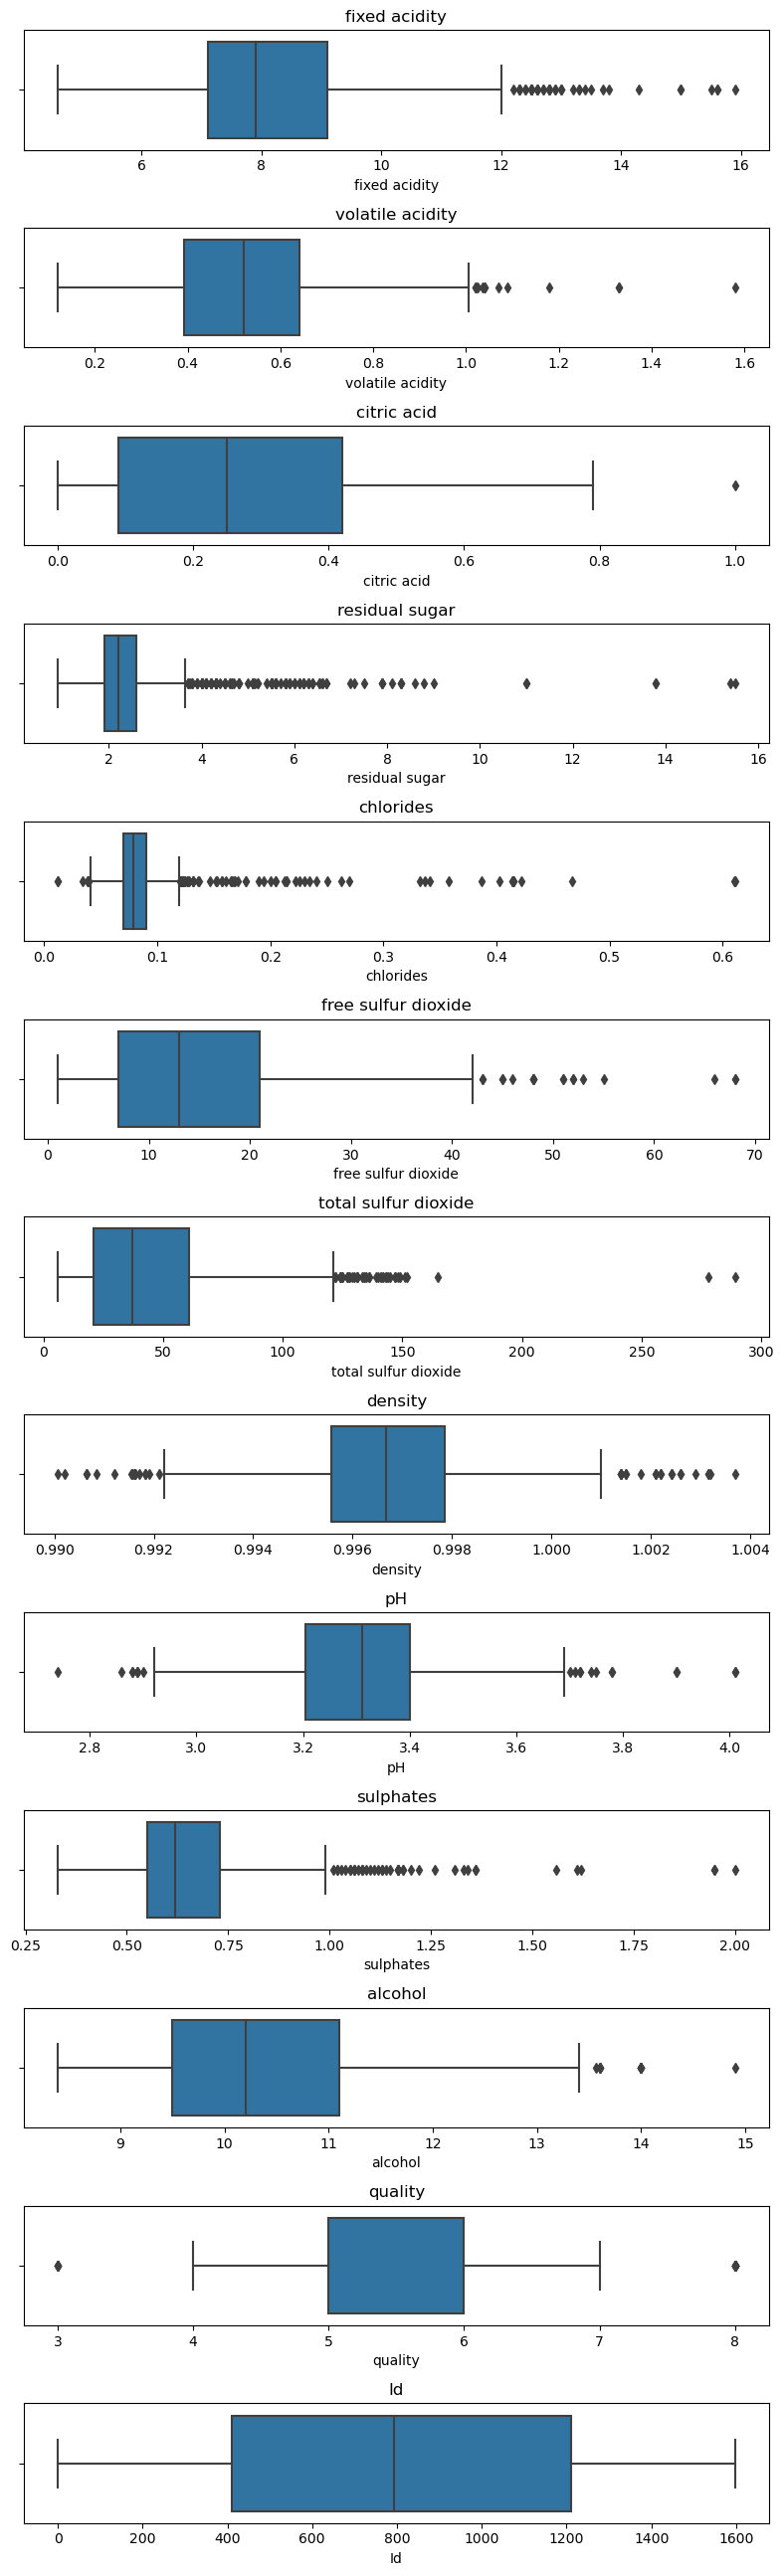

In [11]:
fig,axes=plt.subplots(nrows=len(df.columns),figsize=(8,2*len(df.columns)))
for i,column in enumerate(df.columns):
    sns.boxplot(x=df[column],ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout();

In [12]:
from scipy.stats import zscore

z_scr = (zscore(df[['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']]))

threshold = 3
outlier_mask = (abs(z_scr>threshold)).any(axis=1)
df= df[~outlier_mask]
print(outlier_mask.sum())
df.shape

87


(1056, 13)

# Exploratory Data Analysis

In [13]:
df_corr=df.corr()

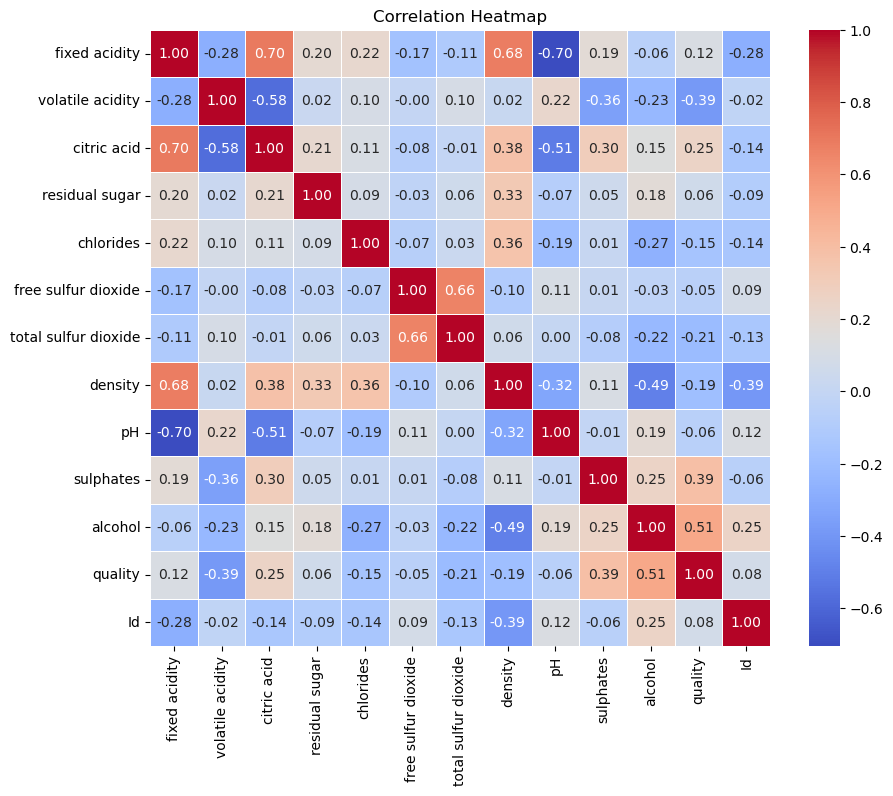

In [14]:
df_corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

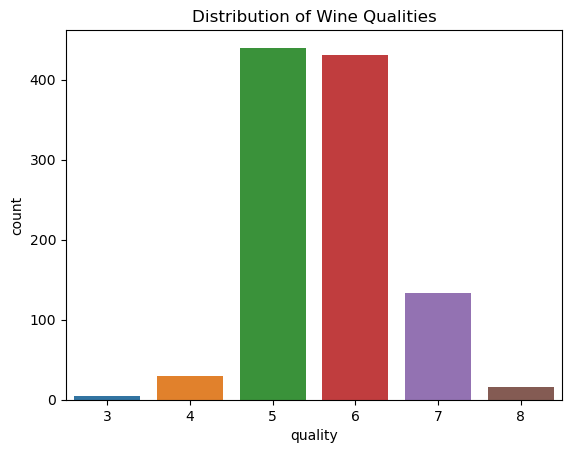

In [15]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Qualities')
plt.show()

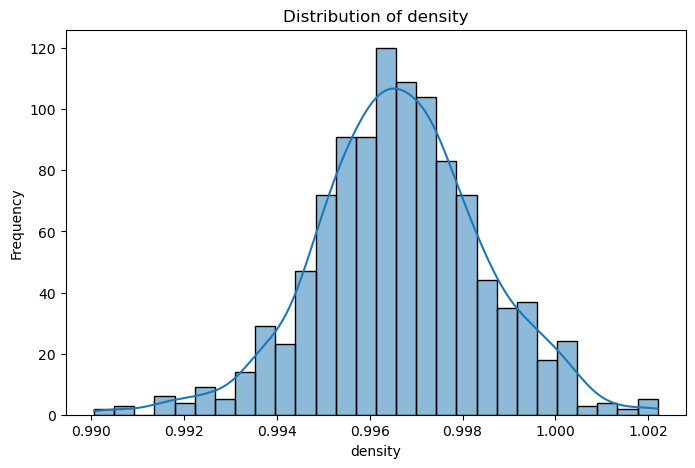

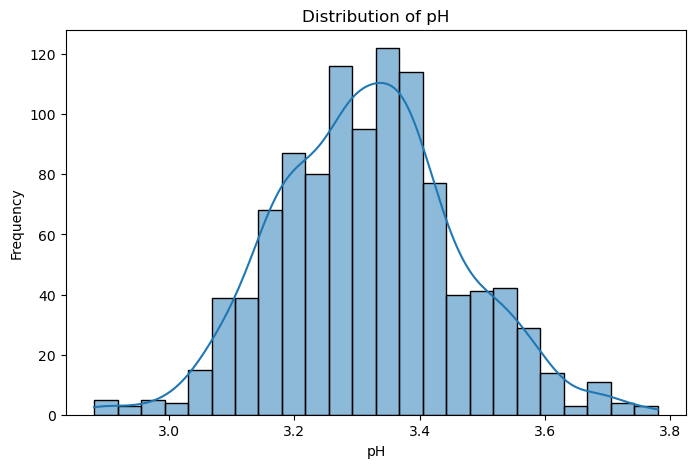

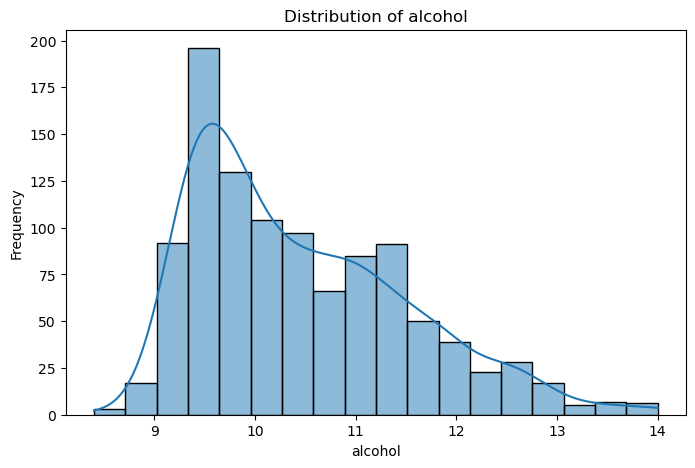

In [16]:
selected_features = ['density', 'pH', 'alcohol']
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

sns.pairplot(df, hue='quality', markers='o', diag_kind='kde')
plt.suptitle('Pairplot of Features colored by Wine Quality', y=1.02)
plt.show()

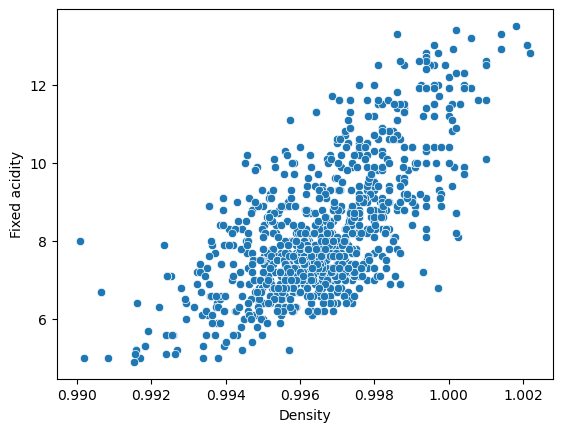

In [17]:
sns.scatterplot(x='density',y='fixed acidity',data=df)
plt.xlabel('Density')
plt.ylabel('Fixed acidity')
plt.show()

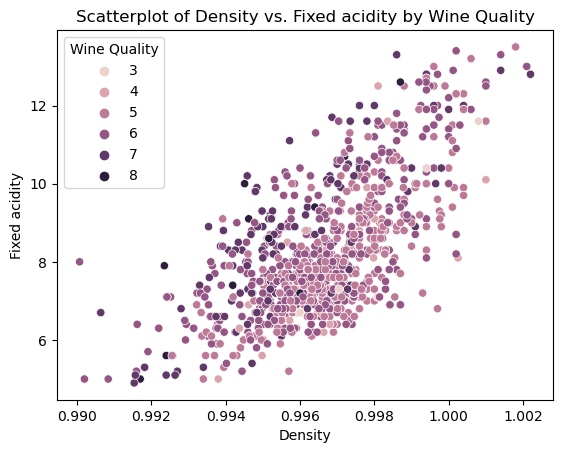

In [18]:
sns.scatterplot(x='density',y='fixed acidity',hue='quality',data=df)
plt.xlabel('Density')
plt.ylabel('Fixed acidity')
plt.title('Scatterplot of Density vs. Fixed acidity by Wine Quality')
plt.legend(title='Wine Quality')
plt.show()

# Data Preparation for Model Building

In [19]:
X=df.drop("quality", axis=1)
y=df['quality']

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=30)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Building and Evaluation

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
rf_predictions = rf_model.predict(X_test)

In [25]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.6515151515151515
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.72      0.78      0.75       119
           6       0.58      0.66      0.62       101
           7       0.60      0.33      0.43        36
           8       0.00      0.00      0.00         1

    accuracy                           0.65       264
   macro avg       0.32      0.30      0.30       264
weighted avg       0.63      0.65      0.63       264

Confusion Matrix:
 [[ 0  0  1  1  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 93 23  3  0]
 [ 0  0 29 67  5  0]
 [ 0  0  2 22 12  0]
 [ 0  0  0  1  0  0]]


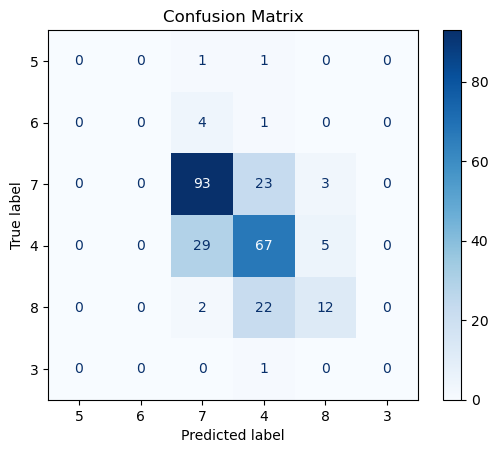

In [26]:
rf_score = accuracy_score(y_test,rf_predictions)
rf_matrix = confusion_matrix(y_test,rf_predictions)
class_labels = df['quality'].unique()
disp1 = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,display_labels=class_labels)
disp1.plot(cmap='Blues',values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Stochastic Gradient Descent

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [28]:
sgd_predictions = sgd_model.predict(X_test)

In [29]:
print("Stochastic Gradient Descent (SGD) Classifier:")
print("Accuracy:", accuracy_score(y_test, sgd_predictions))
print("Classification Report:\n", classification_report(y_test, sgd_predictions, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_predictions))

Stochastic Gradient Descent (SGD) Classifier:
Accuracy: 0.4393939393939394
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.44      0.97      0.61       119
           6       0.00      0.00      0.00       101
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00         1

    accuracy                           0.44       264
   macro avg       0.07      0.16      0.10       264
weighted avg       0.20      0.44      0.28       264

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   0   5   0   0   0]
 [  0   1 116   0   2   0]
 [  0   0 101   0   0   0]
 [  0   0  36   0   0   0]
 [  0   0   1   0   0   0]]


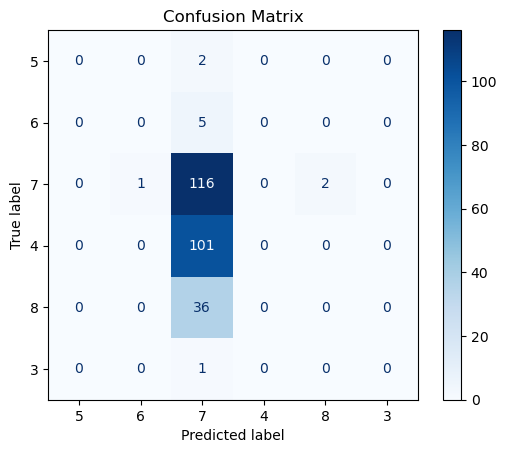

In [30]:
sgd_score = accuracy_score(y_test,sgd_predictions)
sgd_matrix = confusion_matrix(y_test,sgd_predictions)
class_labels = df['quality'].unique()
disp2 = ConfusionMatrixDisplay(confusion_matrix=sgd_matrix,display_labels=class_labels)
disp2.plot(cmap='Blues',values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Classifier

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [32]:
svc_predictions = svc_model.predict(X_test)

In [33]:
print("Support Vector Classifier (SVC):")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print("Classification Report:\n", classification_report(y_test, svc_predictions, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))

Support Vector Classifier (SVC):
Accuracy: 0.4356060606060606
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.50      0.41      0.45       119
           6       0.40      0.65      0.49       101
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00         1

    accuracy                           0.44       264
   macro avg       0.15      0.18      0.16       264
weighted avg       0.38      0.44      0.39       264

Confusion Matrix:
 [[ 0  0  1  1  0  0]
 [ 0  0  1  4  0  0]
 [ 0  0 49 70  0  0]
 [ 0  0 35 66  0  0]
 [ 0  0 11 25  0  0]
 [ 0  0  1  0  0  0]]


In [34]:
svc_score = accuracy_score(y_test,svc_predictions)
svc_matrix = confusion_matrix(y_test,svc_predictions)

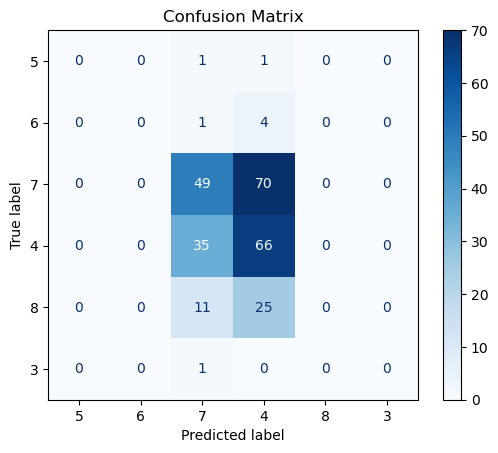

In [35]:
class_labels = df['quality'].unique()
disp3 = ConfusionMatrixDisplay(confusion_matrix=svc_matrix,display_labels=class_labels)
disp3.plot(cmap='Blues',values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Inference

* An accuracy of 0.6515(65.15%) for a Support Vector Machine implies that the model correctly predicted the target variable(wine quality) for approximately 65.15% of instances in the dataset.


* An accuracy of 0.4393(43.93%) for a Support Vector Machine implies that the model correctly predicted the target variable(wine quality) for approximately 43.93% of instances in the dataset.


* An accuracy of 0.4356(43.56%) for a Support Vector Machine implies that the model correctly predicted the target variable(wine quality) for approximately 43.56% of instances in the dataset.